In [5]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_test.shape

(10000, 32, 32, 3)

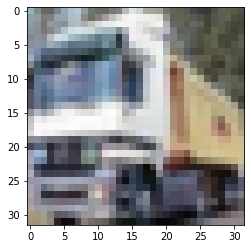

In [10]:
plt.imshow(x_train[1])

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [18]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [19]:
x_train = x_train/255
x_test = x_test/255

In [21]:
ann  = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10,activation = 'sigmoid')
])

ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train,y_train,epochs =5)

Epoch 1/5
1563/1563 [==============================] - 88s 55ms/step - loss: 1.8120 - accuracy: 0.3522
Epoch 2/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.6248 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.5425 - accuracy: 0.4577
Epoch 4/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4807 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.4316 - accuracy: 0.4966


In [23]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]



In [24]:
print("classification report \n",classification_report(y_test,y_pred_classes))

classification report 
               precision    recall  f1-score   support

           0       0.68      0.42      0.52      1000
           1       0.46      0.78      0.58      1000
           2       0.36      0.42      0.39      1000
           3       0.39      0.23      0.29      1000
           4       0.59      0.18      0.28      1000
           5       0.41      0.37      0.39      1000
           6       0.50      0.56      0.53      1000
           7       0.39      0.71      0.51      1000
           8       0.58      0.66      0.62      1000
           9       0.61      0.41      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [27]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32 , kernel_size = (3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters = 64 , kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [31]:
cnn.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [32]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 142s 90ms/step - loss: 1.3586 - accuracy: 0.5091
Epoch 2/10
1563/1563 [==============================] - 144s 92ms/step - loss: 0.9555 - accuracy: 0.6654
Epoch 3/10
1563/1563 [==============================] - 138s 88ms/step - loss: 0.6983 - accuracy: 0.7539
Epoch 4/10
1563/1563 [==============================] - 141s 90ms/step - loss: 0.4622 - accuracy: 0.8350
Epoch 5/10
1563/1563 [==============================] - 136s 87ms/step - loss: 0.2761 - accuracy: 0.9039
Epoch 6/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.1799 - accuracy: 0.9379
Epoch 7/10
1563/1563 [==============================] - 141s 90ms/step - loss: 0.1322 - accuracy: 0.9548
Epoch 8/10
1563/1563 [==============================] - 151s 96ms/step - loss: 0.1121 - accuracy: 0.9627
Epoch 9/10
1563/1563 [==============================] - 160s 102ms/step - loss: 0.0979 - accuracy: 0.9673
Epoch 10/10
1563/1563 [==============================]

In [33]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 12s 19ms/step - loss: 1.9280 - accuracy: 0.6957


[1.928043007850647, 0.6956999897956848]

In [34]:
y_test = y_test.reshape(-1,)


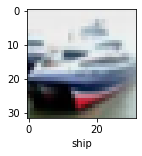

In [35]:
plot_sample(x_test,y_test,1)

In [36]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[1.9412009e-06, 1.4990613e-04, 7.6614042e-06, 9.9587601e-01,
        1.1926755e-05, 3.4468484e-03, 2.5135061e-05, 1.4133800e-06,
        8.0534432e-05, 3.9857705e-04],
       [9.8576017e-08, 6.9274175e-01, 1.7292781e-16, 2.2922022e-12,
        6.4072050e-16, 3.6297903e-15, 6.7001487e-12, 3.5957872e-17,
        3.0725750e-01, 7.0910869e-07],
       [5.2579999e-02, 1.9309101e-01, 7.7149332e-02, 1.6420980e-03,
        3.1708542e-01, 2.2808332e-02, 5.0618418e-04, 1.1120747e-02,
        2.9964706e-01, 2.4369860e-02],
       [9.9834430e-01, 2.5550684e-10, 1.6499487e-04, 5.0039337e-11,
        3.8966625e-09, 8.6415974e-16, 7.9294314e-12, 1.2646159e-11,
        1.4907871e-03, 3.4092587e-10],
       [2.4888622e-09, 8.3748546e-08, 3.0901738e-06, 1.4625095e-04,
        9.9095386e-01, 2.9703589e-05, 8.8665774e-03, 8.0775325e-10,
        1.7452638e-10, 4.7330360e-07]], dtype=float32)

In [41]:
y_classes =[np.argmax(y_pred[0]) for element in y_pred]
y_classes[:5]

[3, 3, 3, 3, 3]

In [47]:
classes[y_classes[3]]

'cat'

In [46]:
classes[y_classes[3]]

'cat'

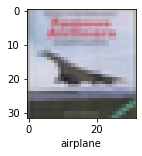

In [45]:
plot_sample(x_test, y_test,3)